## MetENP

MetENP is a R package that enables detection of significant metabolites from metabolite information 
(names or names and concentration along with metadata information) and provides

1. Enrichment score of metabolite class,
2. Maps to pathway of the species of choice,
3. Calculate enrichment score of pathways,
4. Plots the pathways and shows the metabolite increase or decrease
5. Gets gene info, reaction info, enzyme info

For more info, check out the vignette.

In [1]:
if (!requireNamespace("KEGGREST", quietly = TRUE))
    BiocManager::install("KEGGREST", update = TRUE, ask = FALSE)

if (!requireNamespace("KEGGgraph", quietly = TRUE))
    BiocManager::install("KEGGgraph", update = TRUE, ask = FALSE)

if (!requireNamespace("pathview", quietly = TRUE))
    BiocManager::install("pathview", update = TRUE, ask = FALSE)

#if (!requireNamespace("KEGG.db", quietly = TRUE))
#    BiocManager::install("KEGG.db", update = TRUE, ask = FALSE)

#if (!requireNamespace("MetENP", quietly = TRUE))
#    devtools::install("..", upgrade = "never")



##############################################################################
Pathview is an open source software package distributed under GNU General
Public License version 3 (GPLv3). Details of GPLv3 is available at
http://www.gnu.org/licenses/gpl-3.0.html. Particullary, users are required to
formally cite the original Pathview paper (not just mention it) in publications
or products. For details, do citation("pathview") within R.

The pathview downloads and uses KEGG data. Non-academic uses may require a KEGG
license agreement (details at http://www.kegg.jp/kegg/legal.html).
##############################################################################



In [2]:
USER_HOME=Sys.getenv("HOME");
.libPaths( c( .libPaths(), paste0(USER_HOME, "/.local/R") ))
#.libPaths( c( .libPaths(), paste0("../../R") )); # suitable path to where MetENP R package is installed
library(MetENP)

#### If you do not wish to install, alternatively, download from github(https://urldefense.proofpoint.com/v2/url?u=https-3A__github.com_metabolomicsworkbench_MetENP&d=DwIG-g&c=-35OiAkTchMrZOngvJPOeA&r=GYhfUAZGq-9POpToqokefKMYr_BQ-DFVY20dKguoPi0&m=wdNsqXHL1BYa2XWugJYbJU2h-mIvtRKZQGT_C9mgo6WZD-n6WtY7_YB8HvnTVPMv&s=EFaRsxQoq007BXuIparnZS9uCi7Gylpr8xbolXQ9b9E&e= ) and load libraries and functions

In [3]:
data = getmwstudies('ST000897', 'data')
head(data)

analysis_id,analysis_summary,metabolite_name,metabolite_id,refmet_name,H10,H11,H12,H13,H14,⋯,H30,H32,H34,H4,H40,H8,H9,H33,H6,H29
<named list>,<named list>,<named list>,<named list>,<named list>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
AN001459,GC POSITIVE ION MODE,"1,2-Propanediol",ME229271,"1,2-Propanediol",13.07,12.32,14.72,14.45,13.66,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
AN001459,GC POSITIVE ION MODE,2-Aminoadipic acid,ME229272,Aminoadipic acid,19.30,19.30,19.42,19.23,19.42,⋯,18.98,19.53,19.70,17.97,18.45,18.80,19.04,NA,NA,NA
AN001459,GC POSITIVE ION MODE,2-Hydroxypyridine,ME229273,2-Hydroxypyridine,14.39,14.41,14.48,14.52,14.68,⋯,14.55,14.65,14.81,NA,14.35,13.79,14.41,NA,NA,NA
AN001459,GC POSITIVE ION MODE,3-Phosphoglyceric acid,ME229274,3-Phosphoglyceric acid,13.89,13.57,13.97,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
AN001459,GC POSITIVE ION MODE,Adenine,ME229275,Adenine,NA,NA,NA,13.78,12.81,⋯,12.86,12.99,NA,11.77,NA,NA,12.83,NA,NA,NA
AN001459,GC POSITIVE ION MODE,Adenosine,ME229276,Adenosine,13.40,NA,16.90,NA,NA,⋯,NA,13.07,NA,NA,NA,NA,NA,NA,NA,NA


In [4]:
metadata = getmwstudies('ST000897', 'factors')
head(metadata)

,study_id,local_sample_id,subject_type,factors,Animal Group
,<named list>,<named list>,<named list>,<named list>,<chr>
1,ST000897,H13,Animal,Animal Group:Exercise Control,Exercise Control
2,ST000897,H14,Animal,Animal Group:Exercise Control,Exercise Control
3,ST000897,H18,Animal,Animal Group:Exercise Control,Exercise Control
4,ST000897,H2,Animal,Animal Group:Exercise Control,Exercise Control
5,ST000897,H23,Animal,Animal Group:Exercise Control,Exercise Control
6,ST000897,H27,Animal,Animal Group:Exercise Control,Exercise Control


Find the factors you would want to compare
Multiple factors (independent variables) are formatted in multiple columns but you can get information on all the factors by "factors" column, such as 'TreatmentGroup:Prednisolone', this indicates column name 'TreatmentGroup' with factor Prednisolone. For t-test use the factors in the same column. For comparing multipe independent variables use anova by anova_ana function.


### Associate metabolomics data to the refmet class


In [5]:

refmet_class= convert_refmet(data)
head(refmet_class)

,metabolite_name,analysis_id,analysis_summary,metabolite_id,refmet_name,H10,H11,H12,H13,H14,⋯,H40,H8,H9,H33,H6,H29,formula,super_class,main_class,sub_class
,<chr>,<named list>,<named list>,<named list>,<named list>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,"1,2-Propanediol",AN001459,GC POSITIVE ION MODE,ME229271,"1,2-Propanediol",13.07,12.32,14.72,14.45,13.66,⋯,NA,NA,NA,NA,NA,NA,C3H8O2,Fatty Acyls,Fatty alcohols,Fatty alcohols
2,2-Aminoadipic acid,AN001459,GC POSITIVE ION MODE,ME229272,Aminoadipic acid,19.30,19.30,19.42,19.23,19.42,⋯,18.45,18.80,19.04,NA,NA,NA,C6H11NO4,Organic acids,Amino acids and peptides,Amino acids
3,2-Hydroxypyridine,AN001459,GC POSITIVE ION MODE,ME229273,2-Hydroxypyridine,14.39,14.41,14.48,14.52,14.68,⋯,14.35,13.79,14.41,NA,NA,NA,C5H5NO,Organoheterocyclic compounds,Pyridines,Pyridines
4,3-Phosphoglyceric acid,AN001459,GC POSITIVE ION MODE,ME229274,3-Phosphoglyceric acid,13.89,13.57,13.97,NA,NA,⋯,NA,NA,NA,NA,NA,NA,C3H7O7P,Organic acids,Short-chain acids,Short-chain acids
5,Adenine,AN001459,GC POSITIVE ION MODE,ME229275,Adenine,NA,NA,NA,13.78,12.81,⋯,NA,NA,12.83,NA,NA,NA,C5H5N5,Nucleic acids,Purines,6-aminopurines
6,Adenosine,AN001459,GC POSITIVE ION MODE,ME229276,Adenosine,13.40,NA,16.90,NA,NA,⋯,NA,NA,NA,NA,NA,NA,C10H13N5O4,Nucleic acids,Purines,Purine ribonucleosides


In [6]:
unique(metadata$factors)


[[1]]
[1] "Animal Group:Exercise Control"

[[2]]
[1] "Animal Group:Exercise Ischemia/Reperfusion Injury"

[[3]]
[1] "Animal Group:Sedentary Control"

[[4]]
[1] "Animal Group:Sedentary Ischemia/Reperfusion Injury"

In [7]:
### Find the analysis mode
unique(data$analysis_summary)

[[1]]
[1] "GC POSITIVE ION MODE"

### Find significant metabolites, run significance of all the analysis summary together. The analysis summary/modes you got in the previous section
There is a normalization step which takes into account missing values, and this can be achieved via three methods:

1) half_of_min: where the NAs are replaced by half of min values in the data

2) remove_NAs: where Cols with NAs values are removed

3) 50percent: where cols with more than 50% NAs values are removed

half_of_min is ideal when you wish to see which metabolites were present in either group. Very high fold change would mean it was present in either group. 

In [8]:
stats_metabolites = significant_met(metabolomics_data=refmet_class, met_col="metabolite_name",analysis_type=c("GC POSITIVE ION MODE"), 
    metadata=metadata, factor1='Exercise Control', factor2=c('Sedentary Control'), 
    factor_col='Animal Group',sample_col='local_sample_id', p_adjust='BH',normalization="50percent")

sig_metabolites = stats_metabolites[which(stats_metabolites[,"pval"] <= 0.10&abs(stats_metabolites[,"log2Fold_change"])>0.0),]


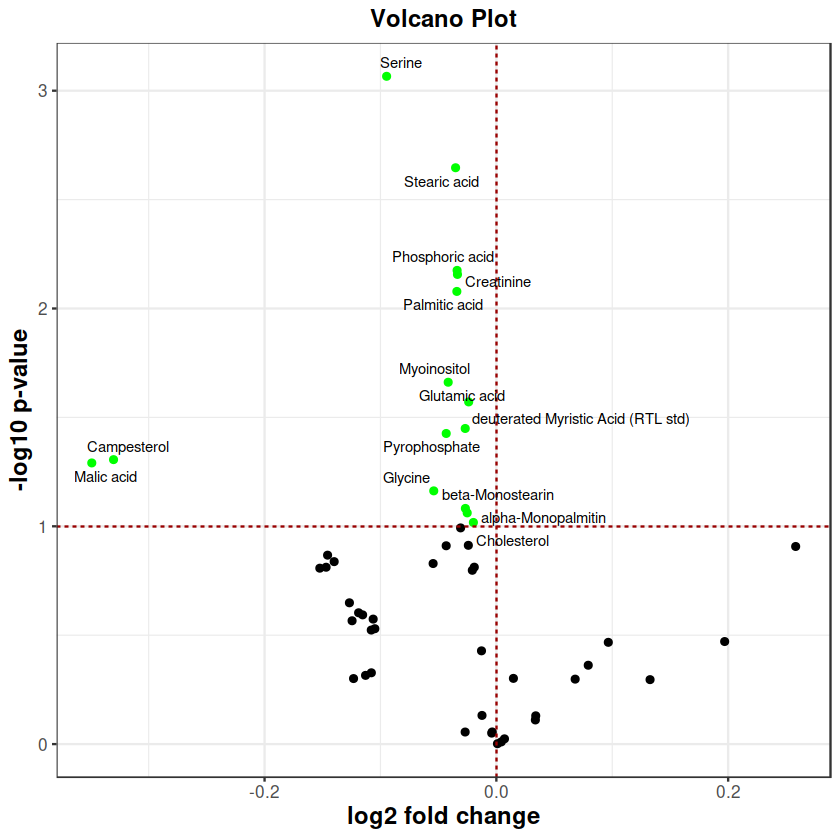

In [9]:
plot_volcano(stats_metabolites, thres_pval= 0.10,thres_log2foldchange = 0.0, TRUE)

### Map metabolite class of the significant metabolites utilzing refmet classification in Metabolomics Workbench
This function not only maps metabolite to metabolite class but also to external databases such as pubchem, inchi key, smiles and kegg

In this example, we will go forward with significant metabolite obtained by t-test/

In [10]:

sig_metabolites_kegg_id= map_keggid(sig_metabolites)

#### Check all your significant metabolites have not been assigned metabolite class

In [11]:
setdiff(sig_metabolites$refmet_name, sig_metabolites_kegg_id$refmet_name)

[1] "Dehydroascorbic acid"

### Count metabolites in each of the metabolite class and plotting
You may choose from sub_class, main_class and super_class

In [12]:
count_changes = metcountplot(df_metclass=sig_metabolites_kegg_id, metclass='sub_class', plotting=TRUE, thres_logfC = 0.0)


Warning message:
“Use of `count_changes[[metclass]]` is discouraged. Use `.data[[metclass]]` instead.”


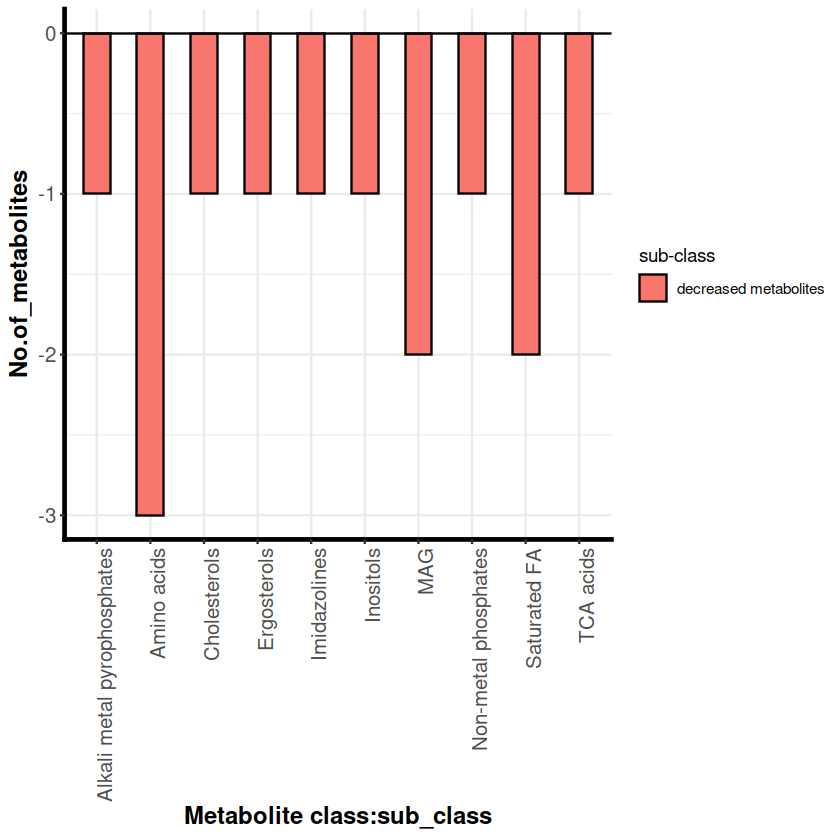

In [13]:
count_changes$plotimg

### Enrichment class score

Calculate the enrichment score of each metabolite class. Enrichment score is calculated through hypergeometric method. One can specify the no. of significant metabolites in a class while calculating the enrichment score. We advice to use the number of mtabolites in each class as 3 or more. But if someone just wants to know the enrichment score and rest of the information of all the metabolites, then they can choose the number as 1.

In [14]:
metenrichment = metclassenrichment(df_metclass=sig_metabolites_kegg_id,refmet_class, metclass="sub_class",enrich_stats="HG",no=1)

#### Plot the enrichment score via function plot_met_enrichment

Warning message:
“Use of `metclass_stats[[metclass]]` is discouraged. Use `.data[[metclass]]` instead.”
Warning message:
“Use of `metclass_stats[[enrich_stats]]` is discouraged. Use `.data[[enrich_stats]]` instead.”
Warning message:
“Use of `metclass_stats[[enrich_stats]]` is discouraged. Use `.data[[enrich_stats]]` instead.”


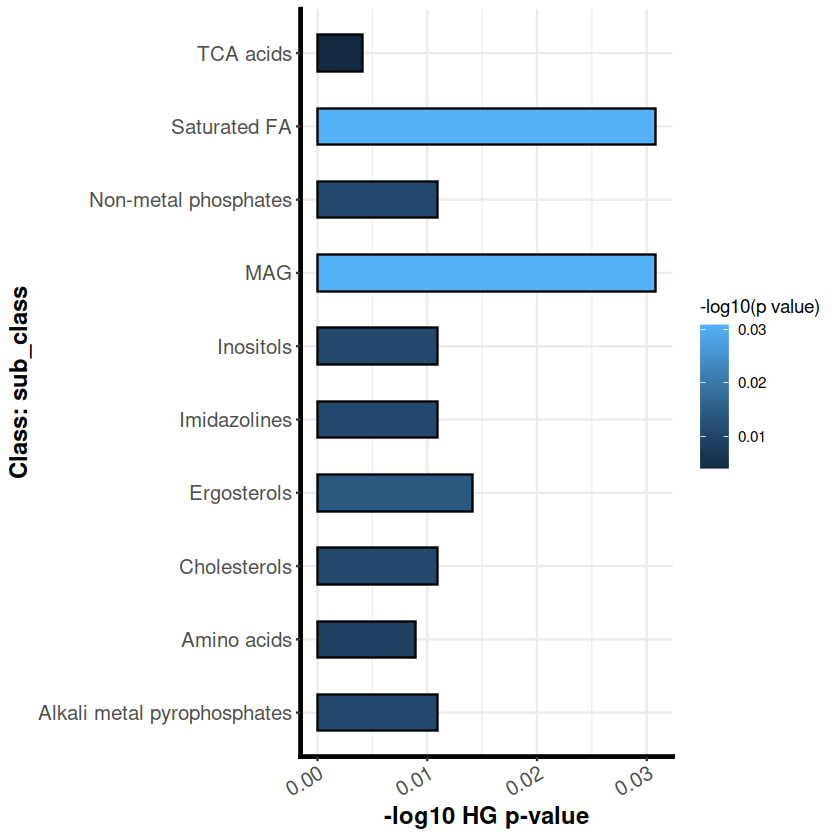

In [15]:
plot_met_enrichment(metenrichment, "sub_class","HG", no=1)

### Check the pathways with reactions of all the significant metabolites

In [16]:
met_path = met_pathways(df_metenrichment = metenrichment, 'rno')
head(met_path)

[1] "query_split val"
$`1`
 [1] "R07427" "R07445" "R07493" "R01451" "R01452" "R01453" "R01454" "R01456"
 [9] "R01457" "R01459"

$`2`
 [1] "R01460" "R01461" "R01462" "R01463" "R02692" "R02723" "R02724" "R07207"
 [9] "R07218" "R08505"

$`3`
 [1] "R08941" "R08977" "R09920" "R11007" "R11008" "R12846" "R01884" "R02922"
 [9] "R07420" "R00021"

$`4`
 [1] "R00093" "R00114" "R00239" "R00243" "R00245" "R00248" "R00250" "R00251"
 [9] "R00253" "R00254"

$`5`
 [1] "R00256" "R00257" "R00258" "R00259" "R00260" "R00261" "R00262" "R00263"
 [9] "R00355" "R00372"

$`6`
 [1] "R00411" "R00457" "R00494" "R00525" "R00573" "R00575" "R00578" "R00609"
 [9] "R00667" "R00668"

$`7`
 [1] "R00684" "R00694" "R00707" "R00708" "R00734" "R00768" "R00894" "R00895"
 [9] "R00908" "R00942"

$`8`
 [1] "R00986" "R01072" "R01090" "R01155" "R01161" "R01214" "R01231" "R01339"
 [9] "R01585" "R01586"

$`9`
 [1] "R01648" "R01654" "R01684" "R01716" "R01939" "R01956" "R02040" "R02077"
 [9] "R02199" "R02237"

$`10`
 [1] "R02274" "R02

,rxn,refmet_name,Exact mass,KEGG ID,Metabolite,Exercise Control_mean,Sedentary Control_mean,Fold_change,log2Fold_change,t_value,⋯,metabolite_id,super_class,main_class,sub_class,formula,HG p-value,Rxn_name,PATHWAY,pathway_id,sps_path_id
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<named list>,<chr>,<chr>,<chr>,<chr>,<dbl>,<named list>,<chr>,<chr>,<chr>
1,R00021,Glutamic acid,147.0532,C00025,Glutamic acid,21.076,20.730,0.9835832,-0.02388097,2.429215,⋯,ME229305,Organic acids,Amino acids and peptides,Amino acids,C5H9NO4,0.9795909,L-glutamate:ferredoxin oxidoreductase (transaminating),Glyoxylate and dicarboxylate metabolism,rn00630,rno00630
2,R00021,Glutamic acid,147.0532,C00025,Glutamic acid,21.076,20.730,0.9835832,-0.02388097,2.429215,⋯,ME229305,Organic acids,Amino acids and peptides,Amino acids,C5H9NO4,0.9795909,L-glutamate:ferredoxin oxidoreductase (transaminating),Nitrogen metabolism,rn00910,rno00910
3,R00086,Phosphoric acid,97.9769,C00009,Phosphoric acid,22.456,21.935,0.9767991,-0.03386626,3.103189,⋯,ME229328,Homogeneous non-metal compounds,Non-metal phosphates,Non-metal phosphates,PH3O4,0.9750745,ATP phosphohydrolase,Purine metabolism,rn00230,rno00230
4,R00086,Phosphoric acid,97.9769,C00009,Phosphoric acid,22.456,21.935,0.9767991,-0.03386626,3.103189,⋯,ME229328,Homogeneous non-metal compounds,Non-metal phosphates,Non-metal phosphates,PH3O4,0.9750745,ATP phosphohydrolase,Metabolic pathways,rn01100,rno01100
5,R00086,Phosphoric acid,97.9769,C00009,Phosphoric acid,22.456,21.935,0.9767991,-0.03386626,3.103189,⋯,ME229328,Homogeneous non-metal compounds,Non-metal phosphates,Non-metal phosphates,PH3O4,0.9750745,ATP phosphohydrolase,Nucleotide metabolism,rn01232,rno01232
6,R00087,Pyrophosphate,221.9071,C00013,Pyrophosphate,19.192,18.625,0.9704564,-0.04326464,2.299739,⋯,ME229330,Mixed metal/non-metal compounds,Alkali metal pyrophosphates,Alkali metal pyrophosphates,P2H2Na2O7,0.9750745,"ATP diphosphohydrolase (diphosphate-forming);, ATP pyrophosphohydrolase",Purine metabolism,rn00230,rno00230


Find metabolites for which no pathways were registered in Kegg and/or no kegg id was found

In [17]:
setdiff(metenrichment$Metabolite,unique(met_path$Metabolite))

character(0)

### Get pathway enrichment sore.

Once we have the pathway information, we can calculate enrichment score of pathways. Again, here i have used hypergeometric score. For hypergeometric score, we need to know the total number of kegg compounds that are linked to kegg pathways. 
N = total no. of cmpds linked to kegg pathway (this is the step which might take long), so I advice to run the script comp_linkedto_pathways() just the first time or after 6 months or so if desired to run the pipeline again. save the result from comp_linkedto_pathways() and load it. Loading from saved file would save time for another analysis with another study. However the package takes care of loading. Save the data in the data folder.

L = No. of cmpds in a pathway
M= no. of altered cmpds in a pathway
K =  total no. of altered cmpds
phyper(M,L, N-L, K)


This function also utilizes korg dataset from pathview package.

In [18]:
load('../data/ls_path.RData')
load('../data/korg.RData')
kegg_es = path_enrichmentscore(met_path,sig_metabolite_kegg_id=sig_metabolite_kegg_id,ls_path=ls_path,refmet_class=refmet_class,sps='rno',padj='BH', kegg_comp_path=FALSE)

Warning message in phyper(M - 1, L, N - L, k, lower.tail = FALSE):
“NaNs produced”
Warning message in phyper(M - 1, L, N - L, k, lower.tail = FALSE):
“NaNs produced”
Warning message in phyper(M - 1, L, N - L, k, lower.tail = FALSE):
“NaNs produced”
Warning message in phyper(M - 1, L, N - L, k, lower.tail = FALSE):
“NaNs produced”
Warning message in phyper(M - 1, L, N - L, k, lower.tail = FALSE):
“NaNs produced”
Warning message in phyper(M - 1, L, N - L, k, lower.tail = FALSE):
“NaNs produced”
Warning message in phyper(M - 1, L, N - L, k, lower.tail = FALSE):
“NaNs produced”


In [19]:
head(kegg_es)

,Pathway name,No.of mets in study,Total_no._of_comps_in_pathway,pathway_HG p-value,Padjust
,<fct>,<int>,<int>,<dbl>,<dbl>
1,"Alanine, aspartate and glutamate metabolism",4,28,0.8553663,1
2,alpha-Linolenic acid metabolism,1,44,0.9999995,1
3,Amino sugar and nucleotide sugar metabolism,3,118,NaN,NaN
4,Aminoacyl-tRNA biosynthesis,5,52,0.9993910,1
5,Arachidonic acid metabolism,4,75,1.0000000,1
6,Arginine and proline metabolism,4,72,1.0000000,1


### Plot pathway network
Only plotting significant pathways (pathway with p-value significance).

The pathway network is such that it shows metabolites that are connected to different pathways and same metabolite in different pathway. Color of nodes of metabolites are according to the fold change of metabolites (low expression in green and high in red) and size of pathway nodes (square nodes) are according to the number of branches (meaning no of metabolites). All metabolite are written in blue

Warning message:
“ggrepel: 30 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


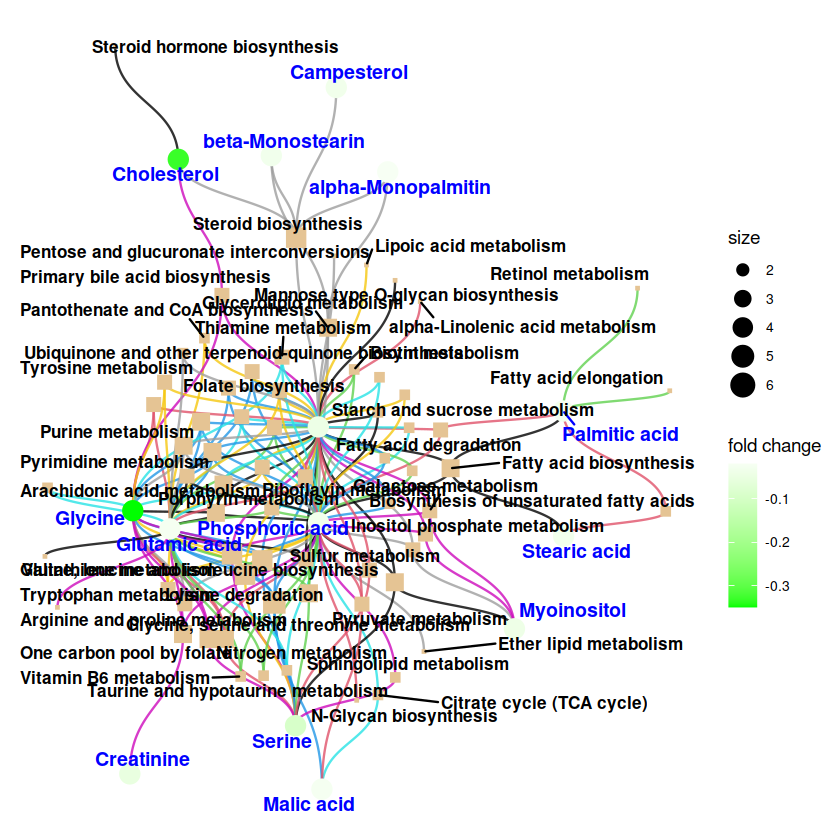

In [20]:
plot_pathway_networks (met_path,kegg_es, TRUE)

### Heatmap

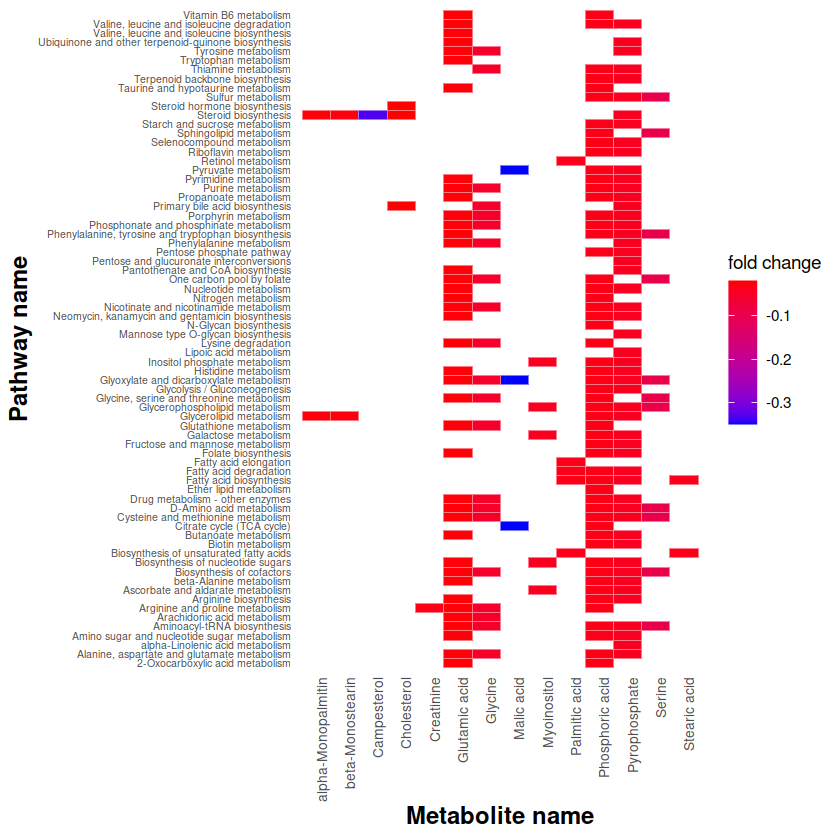

In [21]:
plot_heatmap(met_path, shorten_name=TRUE,refmet_name=FALSE, xaxis=8, yaxis=6)

### Dotplot

Warning message:
“Use of `significant_pathways[["pathway_HG p-value"]]` is discouraged. Use `.data[["pathway_HG p-value"]]` instead.”


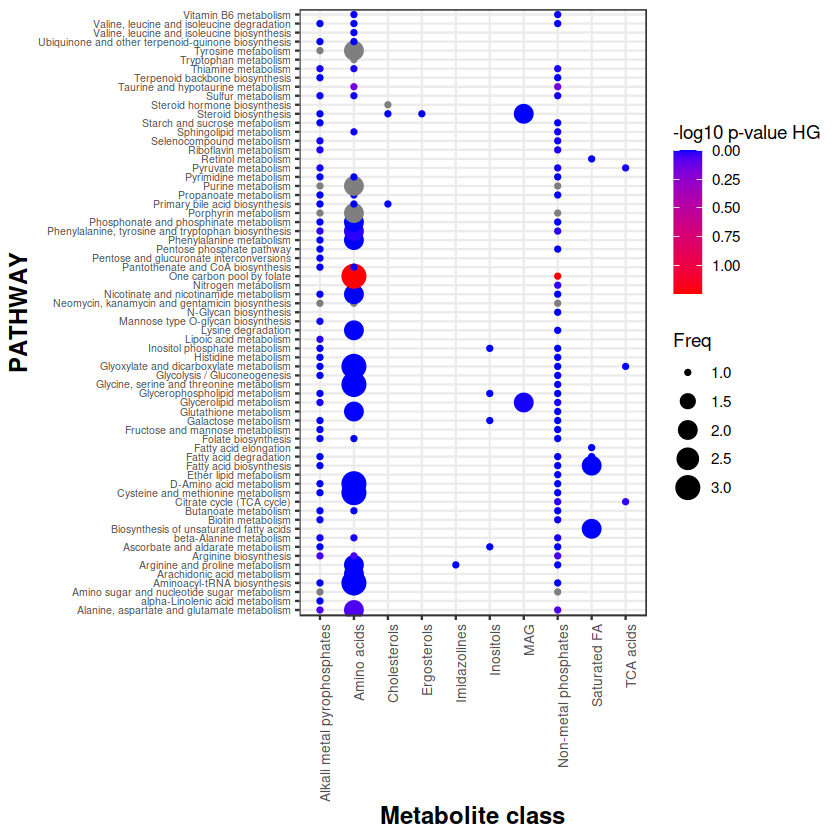

In [22]:

dotplot_met_class_path (met_path, kegg_es,"sub_class",xaxis=8,yaxis=6)

### Get the gene and enzyme info

Here we get the information of genes involved in enriched pathways for specified organism

In [23]:
met_gene_info = enzyme_gene_info (metenrichment, "rno","sub_class")
head(met_gene_info)

[1] "query_split val"
$`1`
 [1] "R07427" "R07445" "R07493" "R01451" "R01452" "R01453" "R01454" "R01456"
 [9] "R01457" "R01459"

$`2`
 [1] "R01460" "R01461" "R01462" "R01463" "R02692" "R02723" "R02724" "R07207"
 [9] "R07218" "R08505"

$`3`
 [1] "R08941" "R08977" "R09920" "R11007" "R11008" "R12846" "R01884" "R02922"
 [9] "R07420" "R00021"

$`4`
 [1] "R00093" "R00114" "R00239" "R00243" "R00245" "R00248" "R00250" "R00251"
 [9] "R00253" "R00254"

$`5`
 [1] "R00256" "R00257" "R00258" "R00259" "R00260" "R00261" "R00262" "R00263"
 [9] "R00355" "R00372"

$`6`
 [1] "R00411" "R00457" "R00494" "R00525" "R00573" "R00575" "R00578" "R00609"
 [9] "R00667" "R00668"

$`7`
 [1] "R00684" "R00694" "R00707" "R00708" "R00734" "R00768" "R00894" "R00895"
 [9] "R00908" "R00942"

$`8`
 [1] "R00986" "R01072" "R01090" "R01155" "R01161" "R01214" "R01231" "R01339"
 [9] "R01585" "R01586"

$`9`
 [1] "R01648" "R01654" "R01684" "R01716" "R01939" "R01956" "R02040" "R02077"
 [9] "R02199" "R02237"

$`10`
 [1] "R02274" "R02

,orthology_id,ORTHOLOGY,gene_id,gene_name,ORGANISM,PATHWAY,DBLINKS,MOTIF,rxn,Metabolite,KEGG ID,sub_class,Rxn_name,RCLASS,EQUATION,EQUATION_more,ENZYME
,<chr>,<chr>,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>,<chr>,<chr>,<chr>,<chr>,<named list>,<named list>,<named list>,<named list>,<named list>
1,K00025,malate dehydrogenase [EC:1.1.1.37],24551,"(RefSeq) malate dehydrogenase, cytoplasmic isoform Mdh1",Rattus norvegicus (rat),"Citrate cycle (TCA cycle) , Cysteine and methionine metabolism , Pyruvate metabolism , Glyoxylate and dicarboxylate metabolism, Metabolic pathways , Carbon metabolism , Proximal tubule bicarbonate reclamation","NCBI-GeneID: 24551 , NCBI-ProteinID: NP_150238 , RGD: 3072 , Ensembl: ENSRNOG00000008103, UniProt: O88989",Pfam: Ldh_1_C Ldh_1_N Glyco_hydro_3_C DM13,R00342,Malic acid,C00149,TCA acids,(S)-malate:NAD+ oxidoreductase,"RC00001 C00003_C00004, RC00031 C00036_C00149",C00149 + C00003 <=> C00036 + C00004 + C00080,(S)-Malate + NAD+ <=> Oxaloacetate + NADH + H+,"1.1.1.37 , 1.1.1.299"
2,K00025,malate dehydrogenase [EC:1.1.1.37],81829,"(RefSeq) malate dehydrogenase, mitochondrial precursor",Rattus norvegicus (rat),"Citrate cycle (TCA cycle) , Cysteine and methionine metabolism , Pyruvate metabolism , Glyoxylate and dicarboxylate metabolism, Metabolic pathways , Carbon metabolism","NCBI-GeneID: 81829 , NCBI-ProteinID: NP_112413 , RGD: 619719 , Ensembl: ENSRNOG00000001440, UniProt: P04636",Pfam: Ldh_1_C Ldh_1_N Semialdhyde_dh 3Beta_HSD THF_DHG_CYH_C NAD_binding_10 DapB_N,R00342,Malic acid,C00149,TCA acids,(S)-malate:NAD+ oxidoreductase,"RC00001 C00003_C00004, RC00031 C00036_C00149",C00149 + C00003 <=> C00036 + C00004 + C00080,(S)-Malate + NAD+ <=> Oxaloacetate + NADH + H+,"1.1.1.37 , 1.1.1.299"
3,K00026,malate dehydrogenase [EC:1.1.1.37],24551,"(RefSeq) malate dehydrogenase, cytoplasmic isoform Mdh1",Rattus norvegicus (rat),"Citrate cycle (TCA cycle) , Cysteine and methionine metabolism , Pyruvate metabolism , Glyoxylate and dicarboxylate metabolism, Metabolic pathways , Carbon metabolism , Proximal tubule bicarbonate reclamation","NCBI-GeneID: 24551 , NCBI-ProteinID: NP_150238 , RGD: 3072 , Ensembl: ENSRNOG00000008103, UniProt: O88989",Pfam: Ldh_1_C Ldh_1_N Glyco_hydro_3_C DM13,R00342,Malic acid,C00149,TCA acids,(S)-malate:NAD+ oxidoreductase,"RC00001 C00003_C00004, RC00031 C00036_C00149",C00149 + C00003 <=> C00036 + C00004 + C00080,(S)-Malate + NAD+ <=> Oxaloacetate + NADH + H+,"1.1.1.37 , 1.1.1.299"
4,K00026,malate dehydrogenase [EC:1.1.1.37],81829,"(RefSeq) malate dehydrogenase, mitochondrial precursor",Rattus norvegicus (rat),"Citrate cycle (TCA cycle) , Cysteine and methionine metabolism , Pyruvate metabolism , Glyoxylate and dicarboxylate metabolism, Metabolic pathways , Carbon metabolism","NCBI-GeneID: 81829 , NCBI-ProteinID: NP_112413 , RGD: 619719 , Ensembl: ENSRNOG00000001440, UniProt: P04636",Pfam: Ldh_1_C Ldh_1_N Semialdhyde_dh 3Beta_HSD THF_DHG_CYH_C NAD_binding_10 DapB_N,R00342,Malic acid,C00149,TCA acids,(S)-malate:NAD+ oxidoreductase,"RC00001 C00003_C00004, RC00031 C00036_C00149",C00149 + C00003 <=> C00036 + C00004 + C00080,(S)-Malate + NAD+ <=> Oxaloacetate + NADH + H+,"1.1.1.37 , 1.1.1.299"
5,K00027,malate dehydrogenase (oxaloacetate-decarboxylating) [EC:1.1.1.38],307270,"(RefSeq) NAD-dependent malic enzyme, mitochondrial",Rattus norvegicus (rat),"Pyruvate metabolism, Carbon metabolism","NCBI-GeneID: 307270 , NCBI-ProteinID: NP_001100846, RGD: 1310321 , Ensembl: ENSRNOG00000015582 , UniProt: D3ZJH9",Pfam: Malic_M malic Transket_pyr DJC28_CD Sulfatase,R00214,Malic acid,C00149,TCA acids,(S)-malate:NAD+ oxidoreductase (decarboxylating),"RC00001 C00003_C00004, RC00105 C00022_C00149",C00149 + C00003 <=> C00022 + C00011 + C00004 + C00080,(S)-Malate + NAD+ <=> Pyruvate + CO2 + NADH + H+,"1.1.1.38, 1.1.1.39"
6,K00029,malate dehydrogenase (oxaloacetate-decarboxylating)(NADP+) [EC:1.1.1.40],24552,(RefSeq) NADP-dependent malic enzyme,Rattus norvegicus (rat),"Pyruvate m

#### Get the information if metabolite is a reactant or substrate

In [24]:
rclass_info = react_substrate(met_gene_info)
head(rclass_info)

,orthology_id,ORTHOLOGY,gene_id,gene_name,ORGANISM,PATHWAY,DBLINKS,MOTIF,rxn,Metabolite,KEGG ID,sub_class,Rxn_name,RCLASS,EQUATION,EQUATION_more,ENZYME,reactant_product
,<chr>,<chr>,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>,<chr>,<chr>,<chr>,<chr>,<named list>,<named list>,<named list>,<named list>,<named list>,<chr>
1,K00025,malate dehydrogenase [EC:1.1.1.37],24551,"(RefSeq) malate dehydrogenase, cytoplasmic isoform Mdh1",Rattus norvegicus (rat),"Citrate cycle (TCA cycle) , Cysteine and methionine metabolism , Pyruvate metabolism , Glyoxylate and dicarboxylate metabolism, Metabolic pathways , Carbon metabolism , Proximal tubule bicarbonate reclamation","NCBI-GeneID: 24551 , NCBI-ProteinID: NP_150238 , RGD: 3072 , Ensembl: ENSRNOG00000008103, UniProt: O88989",Pfam: Ldh_1_C Ldh_1_N Glyco_hydro_3_C DM13,R00342,Malic acid,C00149,TCA acids,(S)-malate:NAD+ oxidoreductase,"RC00001 C00003_C00004, RC00031 C00036_C00149",C00149 + C00003 <=> C00036 + C00004 + C00080,(S)-Malate + NAD+ <=> Oxaloacetate + NADH + H+,"1.1.1.37 , 1.1.1.299",Substrate
2,K00025,malate dehydrogenase [EC:1.1.1.37],81829,"(RefSeq) malate dehydrogenase, mitochondrial precursor",Rattus norvegicus (rat),"Citrate cycle (TCA cycle) , Cysteine and methionine metabolism , Pyruvate metabolism , Glyoxylate and dicarboxylate metabolism, Metabolic pathways , Carbon metabolism","NCBI-GeneID: 81829 , NCBI-ProteinID: NP_112413 , RGD: 619719 , Ensembl: ENSRNOG00000001440, UniProt: P04636",Pfam: Ldh_1_C Ldh_1_N Semialdhyde_dh 3Beta_HSD THF_DHG_CYH_C NAD_binding_10 DapB_N,R00342,Malic acid,C00149,TCA acids,(S)-malate:NAD+ oxidoreductase,"RC00001 C00003_C00004, RC00031 C00036_C00149",C00149 + C00003 <=> C00036 + C00004 + C00080,(S)-Malate + NAD+ <=> Oxaloacetate + NADH + H+,"1.1.1.37 , 1.1.1.299",Substrate
3,K00026,malate dehydrogenase [EC:1.1.1.37],24551,"(RefSeq) malate dehydrogenase, cytoplasmic isoform Mdh1",Rattus norvegicus (rat),"Citrate cycle (TCA cycle) , Cysteine and methionine metabolism , Pyruvate metabolism , Glyoxylate and dicarboxylate metabolism, Metabolic pathways , Carbon metabolism , Proximal tubule bicarbonate reclamation","NCBI-GeneID: 24551 , NCBI-ProteinID: NP_150238 , RGD: 3072 , Ensembl: ENSRNOG00000008103, UniProt: O88989",Pfam: Ldh_1_C Ldh_1_N Glyco_hydro_3_C DM13,R00342,Malic acid,C00149,TCA acids,(S)-malate:NAD+ oxidoreductase,"RC00001 C00003_C00004, RC00031 C00036_C00149",C00149 + C00003 <=> C00036 + C00004 + C00080,(S)-Malate + NAD+ <=> Oxaloacetate + NADH + H+,"1.1.1.37 , 1.1.1.299",Substrate
4,K00026,malate dehydrogenase [EC:1.1.1.37],81829,"(RefSeq) malate dehydrogenase, mitochondrial precursor",Rattus norvegicus (rat),"Citrate cycle (TCA cycle) , Cysteine and methionine metabolism , Pyruvate metabolism , Glyoxylate and dicarboxylate metabolism, Metabolic pathways , Carbon metabolism","NCBI-GeneID: 81829 , NCBI-ProteinID: NP_112413 , RGD: 619719 , Ensembl: ENSRNOG00000001440, UniProt: P04636",Pfam: Ldh_1_C Ldh_1_N Semialdhyde_dh 3Beta_HSD THF_DHG_CYH_C NAD_binding_10 DapB_N,R00342,Malic acid,C00149,TCA acids,(S)-malate:NAD+ oxidoreductase,"RC00001 C00003_C00004, RC00031 C00036_C00149",C00149 + C00003 <=> C00036 + C00004 + C00080,(S)-Malate + NAD+ <=> Oxaloacetate + NADH + H+,"1.1.1.37 , 1.1.1.299",Substrate
5,K00027,malate dehydrogenase (oxaloacetate-decarboxylating) [EC:1.1.1.38],307270,"(RefSeq) NAD-dependent malic enzyme, mitochondrial",Rattus norvegicus (rat),"Pyruvate metabolism, Carbon metabolism","NCBI-GeneID: 307270 , NCBI-ProteinID: NP_001100846, RGD: 1310321 , Ensembl: ENSRNOG00000015582 , UniProt: D3ZJH9",Pfam: Malic_M malic Transket_pyr DJC28_CD Sulfatase,R00214,Malic acid,C00149,TCA acids,(S)-malate:NAD+ oxidoreductase (decarboxylating),"RC00001 C00003_C00004, RC00105 C00022_C00149",C00149 + C00003 <=> C00022 + C00011 + C00004 + C00080,(S)-Malate + NAD+ <=> Pyruvate + CO2 + NADH + H+,"1.1.1.38, 1.1.1.39",Substrate
6,K00029,malate dehydrogenase (oxaloacetate-decarboxylating)(NADP+) [EC:1.1.1.40],24552

#### Get gene info in short form

In [25]:
met_gene_info2=data.table::data.table(rclass_info)[,lapply(.SD, function(x) toString(unique(x))), by = 'Metabolite']